In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [48]:
pd.set_option("display.max_rows", None,
             "display.max_columns", None)

In [49]:
dataset = pd.read_csv("/Users/boramert/Desktop/Code/bil570proje/archive/dataset_time.csv")

In [50]:
dataset.shape

(1050000, 88)

In [51]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [52]:
dataset.dropna(axis = 'index', inplace=True)

In [53]:
dataset.shape

(1050000, 88)

In [54]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,timestamp_year,timestamp_month,timestamp_day,timestamp_hour,timestamp_minute,timestamp_second
0,0,0,242184,22,6,377659,22,20,1928,2665,640,0,87.636364,137.780552,976,0,133.250000,268.771254,12161.764978,111.211437,9211.195122,20466.566442,114332,3,377608,17981.333333,29589.523282,114332,237,377656,19876.631579,37471.983784,154633,11,0,0,0,0,712,648,58.253610,52.957827,0,976,106.813953,207.287040,42967.916944,0,0,0,1,0,0,0,0,0,109.357143,87.636364,133.250000,0,0,0,0,0,0,22,1928,20,2665,26883,230,16,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,2018,2,14,2,38,46
1,1,1,964331,53,17,1138,1,1,45,115,45,45,45.000000,0.000000,115,115,115.000000,0.000000,140597.539543,1757.469244,1138.000000,0.000000,1138,1138,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,8,8,878.734622,878.734622,45,115,68.333333,40.414519,1633.333333,0,0,0,0,0,0,0,0,1,102.500000,45.000000,115.000000,0,0,0,0,0,0,1,45,1,115,-1,-1,0,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign,2018,2,14,12,33,50
2,2,2,203429,22,6,8,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,250000.000000,8.000000,0.000000,8,8,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,32,32,125000.000000,125000.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,241,230,0,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,2018,2,14,2,6,35
3,3,3,189325,22,6,379123,23,22,1928,2665,640,0,83.826087,135.847392,976,0,121.136364,258.641560,12114.801793,118.694988,8616.431818,18876.545547,79386,2,377917,17178.045455,28670.122654,104169,317,379121,18053.380952,32949.088950,116016,10,0,0,0,0,744,712,60.666327,58.028661,0,976,99.847826,202.025737,40814.398551,0,0,0,1,0,0,0,0,0,102.066667,83.826087,121.136364,0,0,0,0,0,0,23,1928,22,2665,26883,230,16,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,2018,2,14,2,11,20
4,4,4,261223,22,6,376212,22,20,1912,2665,640,0,86.909091,137.688022,976,0,133.250000,268.771254,12166.012780,111.639182,9175.902439,23874.579099,135973,5,376152,17912.000000,32991.220059,135973,201,376204,19800.210526,44138.666841,174866,14,0,0,0,0,712,648,58.477667,53.161515,0,976,106.441860,207.291869,42969.919158,0,0,0,1,0,0,0,0,0,108.976190,86.909091,133.250000,0,0,0,0,0,0,22,1912,20,2665,26883,230,16,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,2018,2,14,2,47,56


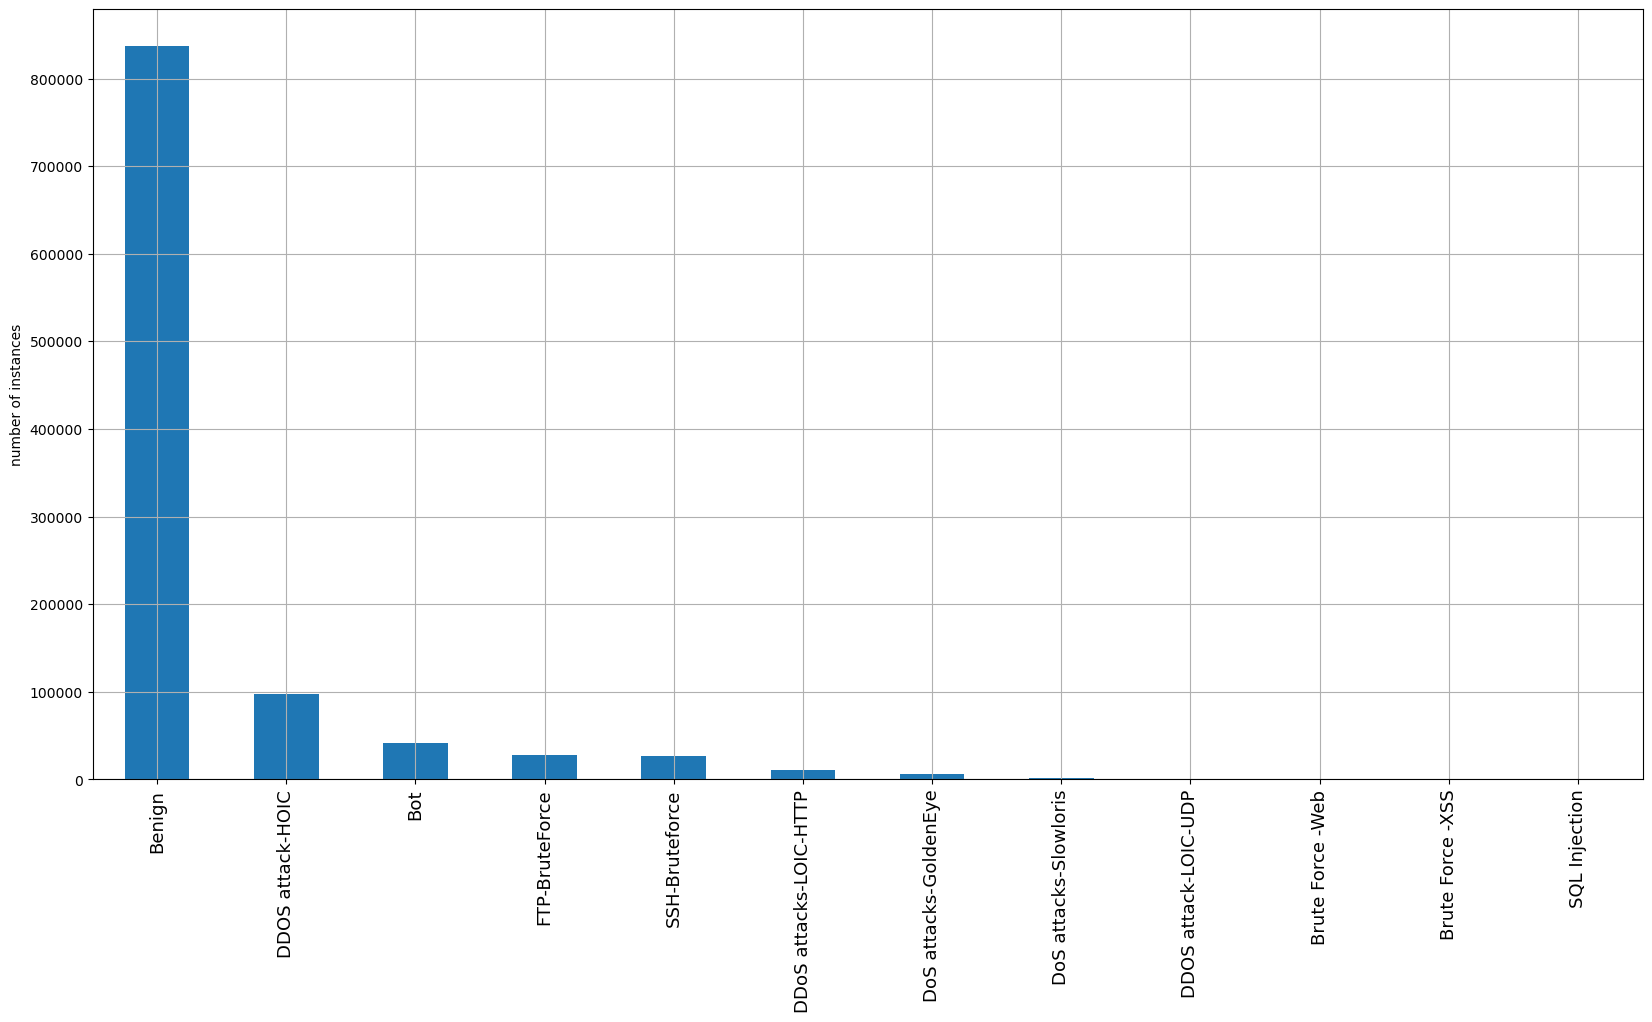

In [55]:
pd.value_counts(dataset['Label']).plot(kind='bar', figsize=(20, 10))
plt.ylabel('number of instances')
plt.xticks(fontsize=13)
plt.grid()
plt.show()

In [56]:
dataset['Label'].unique()

array(['SSH-Bruteforce', 'Benign', 'FTP-BruteForce',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDoS attacks-LOIC-HTTP', 'DDOS attack-HOIC',
       'DDOS attack-LOIC-UDP', 'Bot', 'Brute Force -Web',
       'Brute Force -XSS', 'SQL Injection'], dtype=object)

In [57]:
le = LabelEncoder()
dataset['Label'] = le.fit_transform(dataset['Label'])

In [58]:
dataset['Label'].unique()

array([11,  0,  9,  7,  8,  6,  4,  5,  1,  2,  3, 10])

In [59]:
labels = dataset['Label']
data = dataset.loc[:, dataset.columns != 'Label']

In [60]:
scaler = StandardScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
dataset_scaled['Label'] = labels

In [61]:
dataset_scaled.head()

,Unnamed: 0.1,Unnamed: 0,index,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,timestamp_year,timestamp_month,timestamp_day,timestamp_hour,timestamp_minute,timestamp_second,Label
0,-1.732049,-1.732049,-0.511619,-0.483494,-0.521518,-0.019496,-0.007458,0.073490,0.008810,-0.011261,1.448622,-0.425601,0.614166,0.553766,1.298968,-0.477712,0.139024,0.699405,-0.073618,-0.206150,-0.184319,-0.002794,-0.007394,-0.001769,-0.018960,-0.194726,-0.002861,-0.007203,-0.001857,-0.263799,-0.172828,-0.229805,-0.221703,-0.066314,-0.185336,0.0,0.0,0.0,0.021460,0.141563,-0.183600,-0.176997,-0.443170,1.178021,0.282653,0.545383,0.036709,-0.062549,-0.185336,-0.481674,1.152357,-0.692208,-0.220026,0.0,-0.481671,-0.659189,0.192663,0.614166,0.139024,0.0,0.0,0.0,0.0,0.0,0.0,-0.007458,0.008810,0.073490,-0.011261,0.655671,-0.436491,-0.008609,1.959117,-0.064372,-0.051538,-0.076636,-0.052844,-0.011199,-0.001791,-0.006119,-0.211246,0.00169,-0.408234,-0.39931,-1.073248,0.569180,0.959232,11
1,-1.732046,-1.732046,-0.034168,-0.481868,1.804317,-0.020150,-0.018159,-0.032930,-0.021183,-0.021124,-0.535046,1.494761,-0.095587,-0.635585,-0.463116,1.856615,0.028907,-0.651580,-0.036383,-0.200465,-0.184661,-0.002829,-0.007497,-0.001768,-0.019616,-0.195485,-0.002911,-0.007307,-0.001857,-0.279135,-0.177864,-0.242058,-0.238137,-0.066317,-0.185336,0.0,0.0,0.0,-0.022696,-0.038632,-0.179774,-0.169808,1.579868,-0.532041,-0.076918,-0.493911,-0.494806,-0.062549,-0.185336,-0.481674,-0.867786,-0.692208,-0.220026,0.0,-0.481671,0.703150,0.131328,-0.095587,0.028907,0.0,0.0,0.0,0.0,0.0,0.0,-0.018159,-0.021183,-0.032930,-0.021123,-0.662089,-0.447674,-0.016768,-1.394480,-0.064372,-0.051538,-0.076636,-0.052844,-0.011199,-0.001791,-0.006119,-0.211246,0.00169,-0.408234,-0.39931,1.402060,0.263719,1.189513,0
2,-1.732043,-1.732043,-0.537242,-0.483494,-0.521518,-0.020152,-0.018159,-0.032930,-0.021900,-0.021569,-0.685071,-0.425601,-0.844686,-0.635585,-0.698470,-0.477712,-0.664980,-0.651580,-0.077143,0.656657,-0.184709,-0.002829,-0.007498,-0.001769,-0.019616,-0.195485,-0.002911,-0.007307,-0.001857,-0.279135,-0.177864,-0.242058,-0.238137,-0.066317,-0.185336,0.0,0.0,0.0,-0.021191,-0.031874,0.398992,0.910756,-0.443170,-0.760446,-0.715439,-0.745615,-0.515809,-0.062549,-0.185336,-0.481674,-0.867786,1.444652,4.544907,0.0,-0.481671,0.703150,-0.785505,-0.844686,-0.664980,0.0,0.0,0.0,0.0,0.0,0.0,-0.018159,-0.021900,-0.032930,-0.021568,-0.650227,-0.436491,-0.016768,1.959117,-0.064372,-0.051538,-0.076636,-0.052844,-0.011199,-0.001791,-0.006119,-0.211246,0.00169,-0.408234,-0.39931,-1.073248,-1.385769,0.325959,11
3,-1.732039,-1.732039,-0.546567,-0.483494,-0.521518,-0.019494,-0.006948,0.084692,0.008810,-0.011261,1.448622,-0.425601,0.550738,0.537079,1.298968,-0.477712,0.065933,0.648487,-0.073631,-0.206124,-0.184344,-0.002797,-0.007426,-0.001769,-0.018960,-0.194760,-0.002862,-0.007212,-0.001857,-0.263739,-0.173290,-0.231284,-0.225807,-0.066314,-0.185336,0.0,0.0,0.0,0.023467,0.159583,-0.183589,-0.176953,-0.443170,1.1

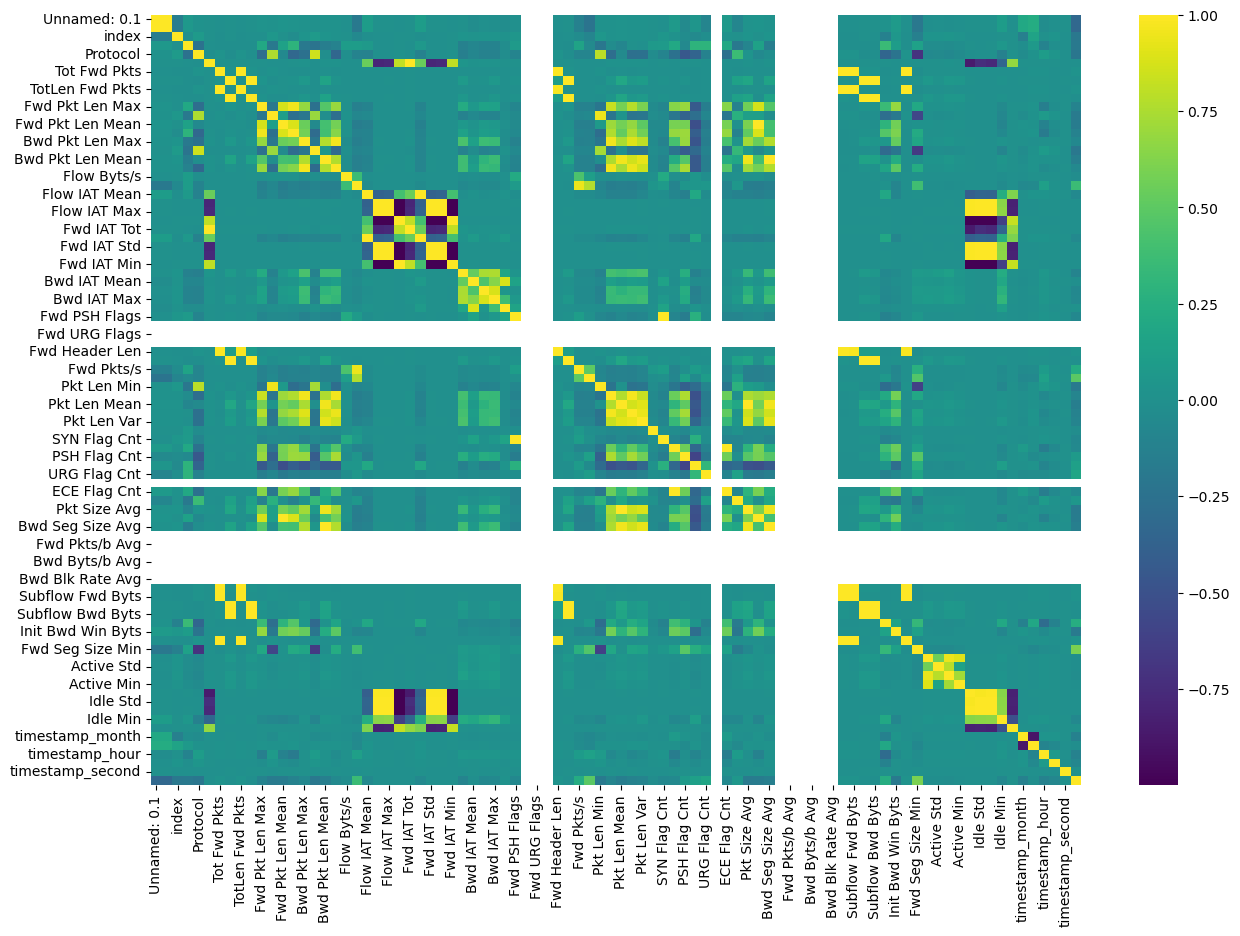

In [62]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset_scaled.corr(), cmap='viridis')
plt.show()

In [63]:
dataset_scaled.to_csv(r'/Users/boramert/Desktop/Code/bil570proje/archive/dataset_scaled.csv')